### Problema de negócio -> *Definir faixas de valores que definem se o preço está alto ou baixo* 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
database = pd.read_csv("C:/Users/ireis/Desktop/Projetos Python/Python/Datasets/Preço de Celular/train.csv")

### Carregamento da base de dados

In [7]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Verificação de valores nulos e tipos dos valores em colunas

In [11]:
database['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

### Verificação da disposição dos tipos de valores que existem, aparentemente o fornecedor classificou em 4 classes com valores indo de 0 a 3 onde 0 pode ser de valores mais baixos e 3 de valores mais altos.


In [12]:
database.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


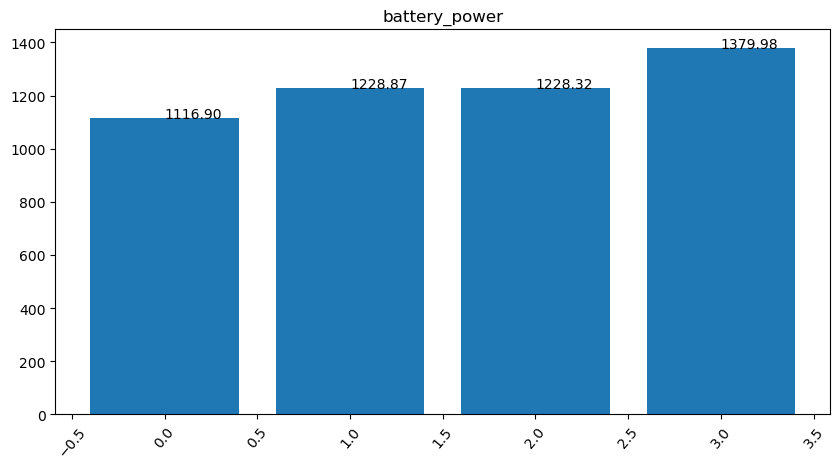

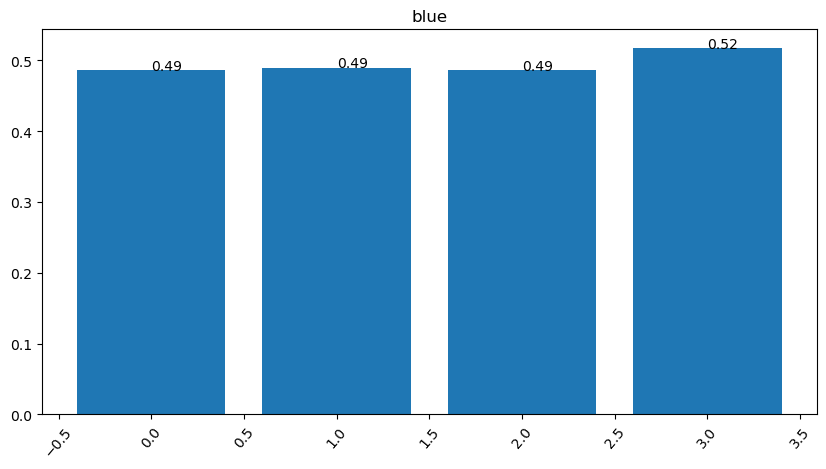

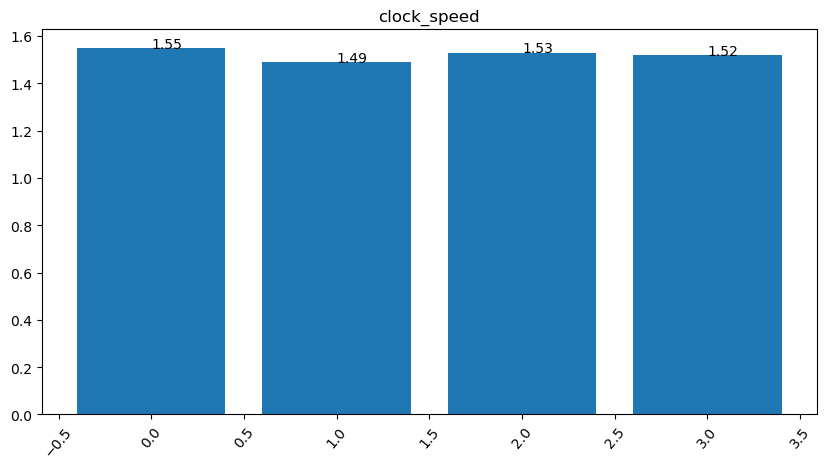

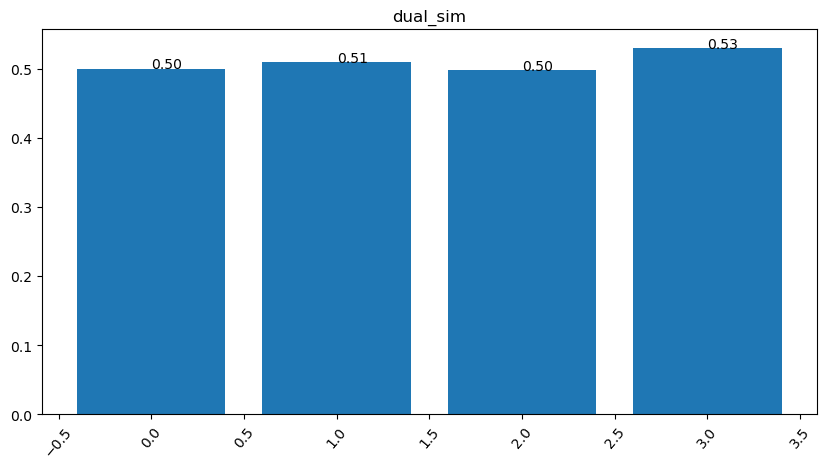

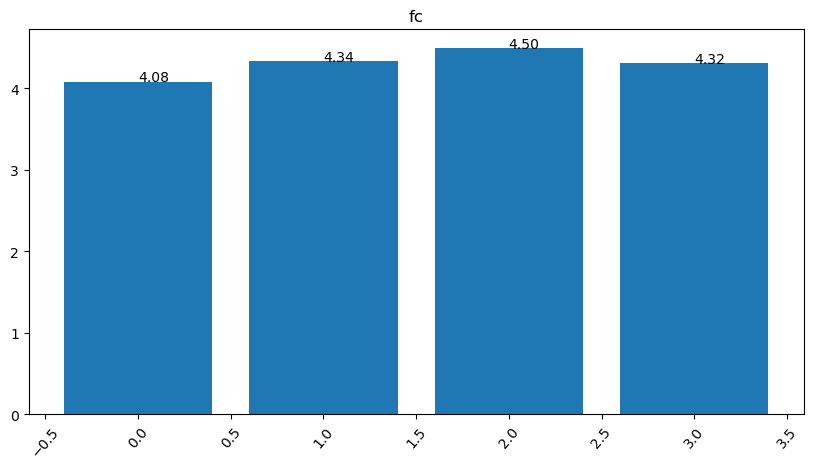

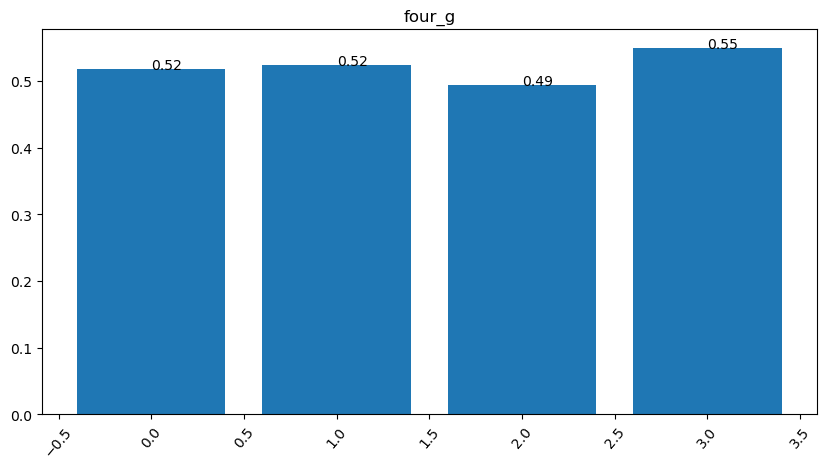

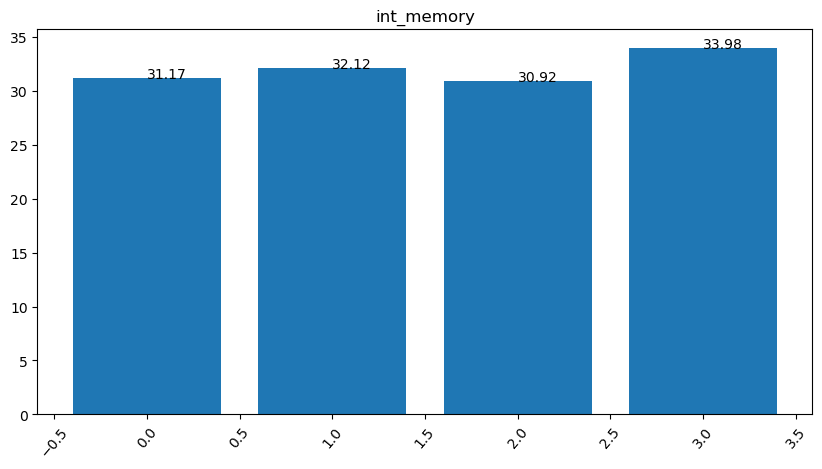

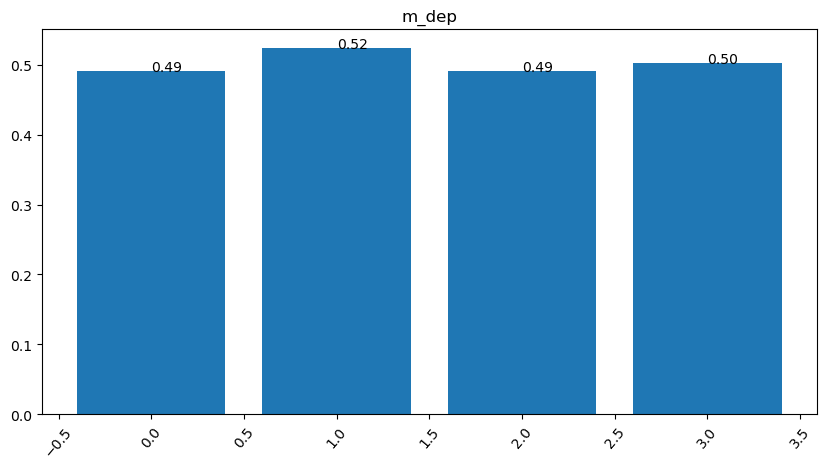

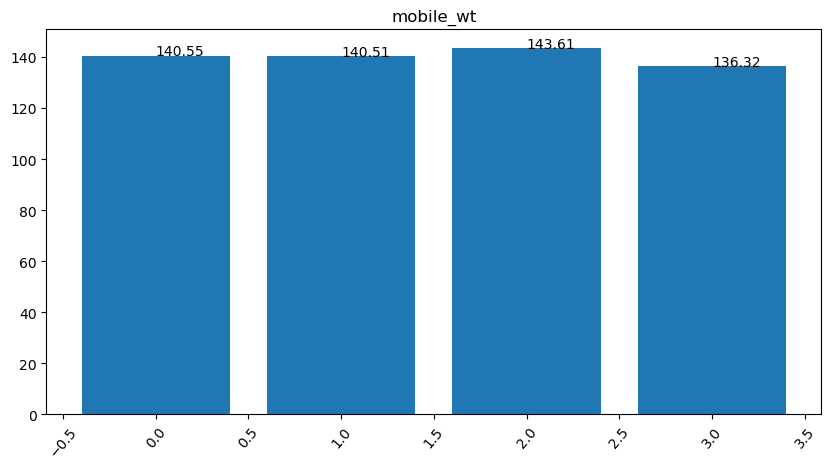

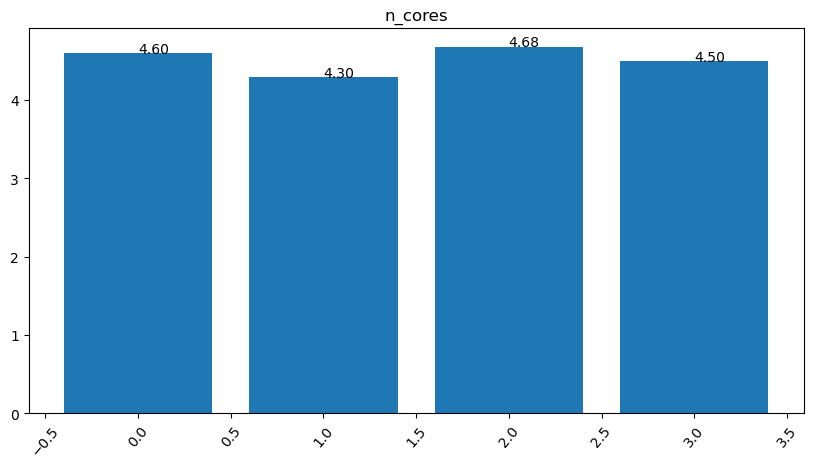

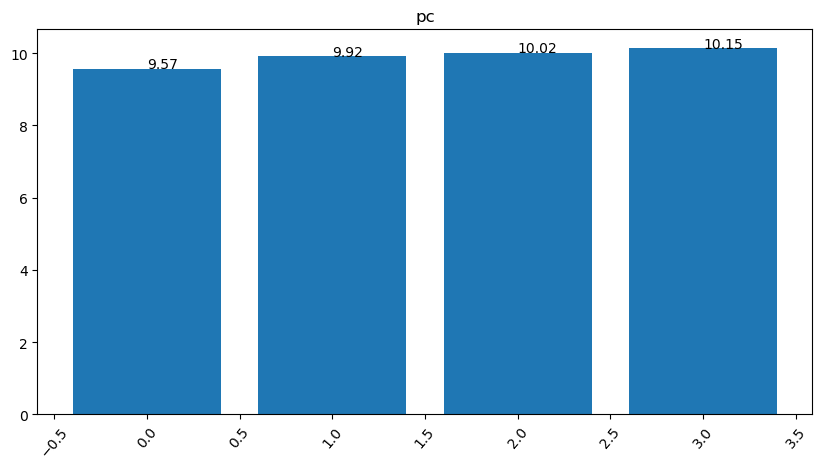

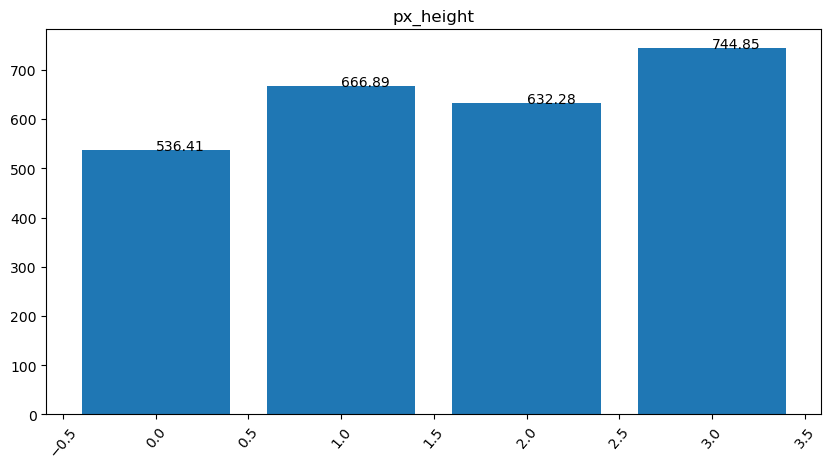

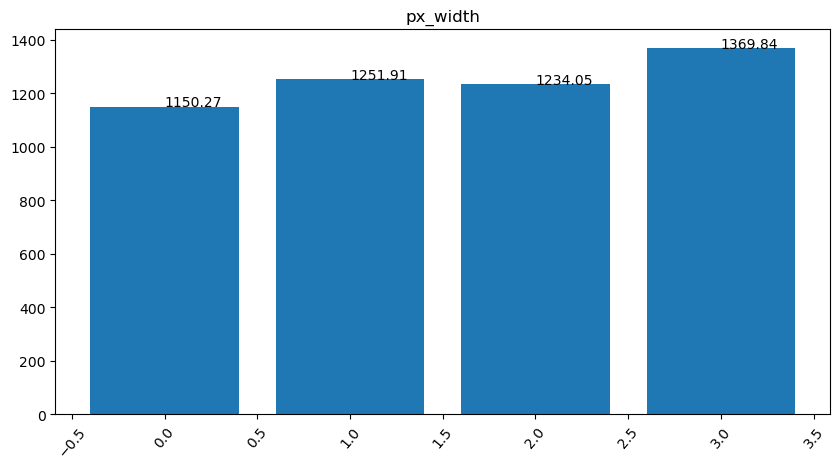

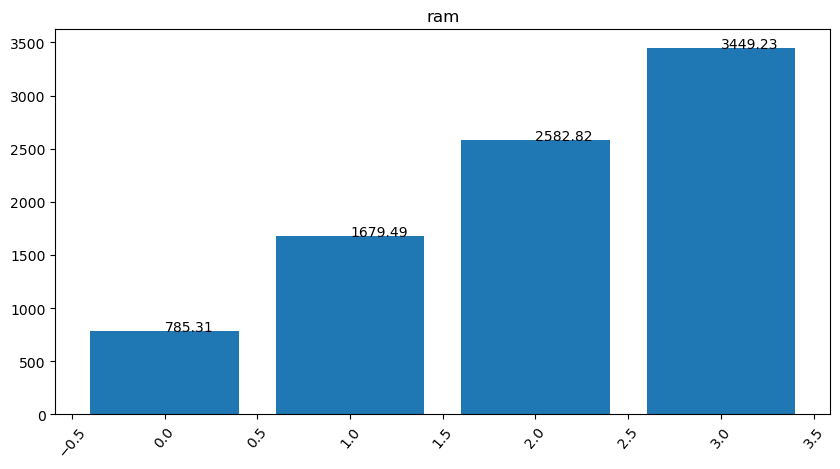

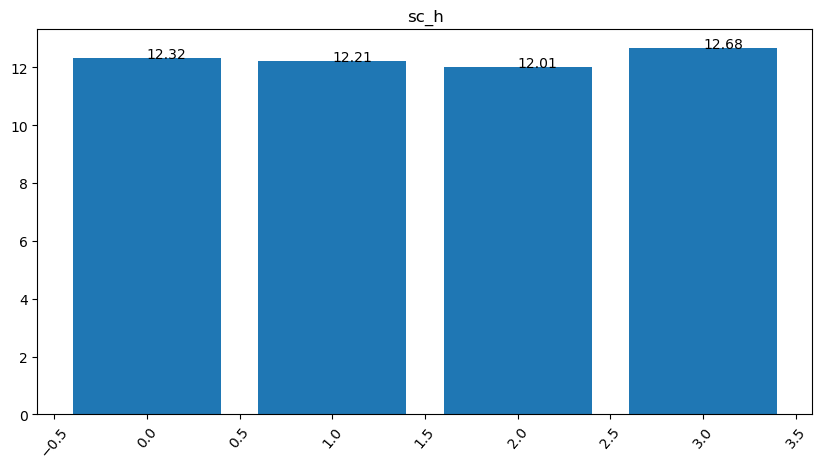

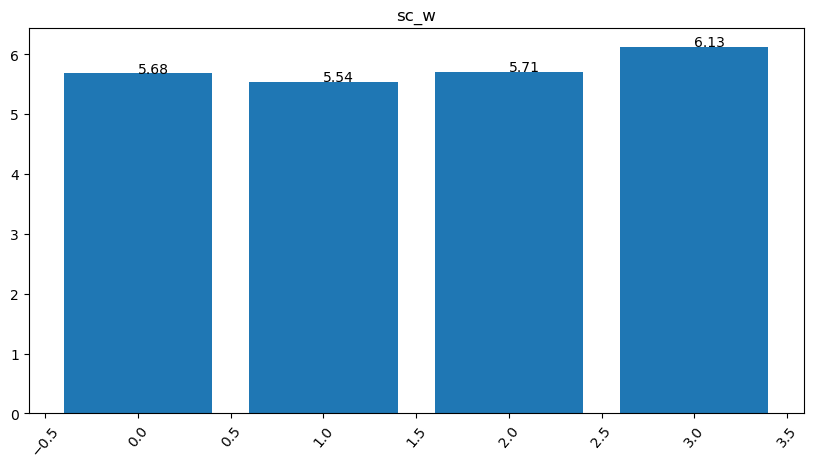

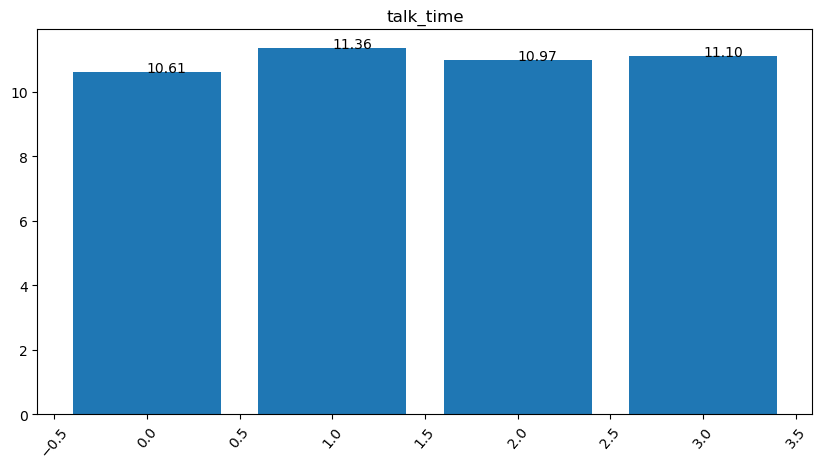

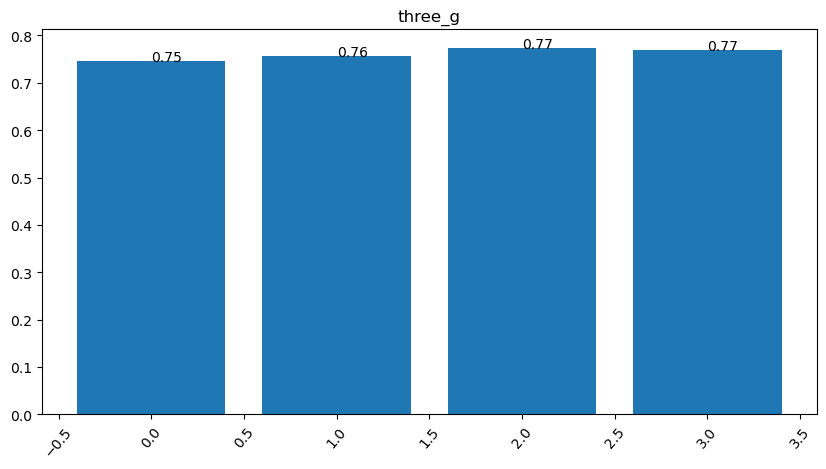

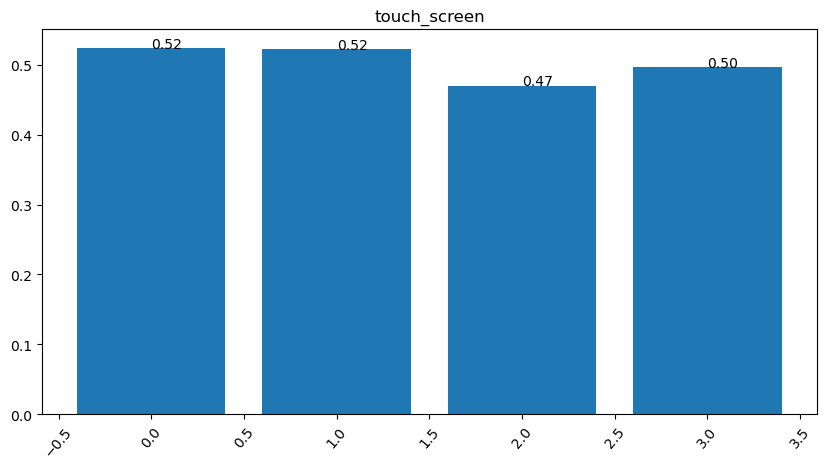

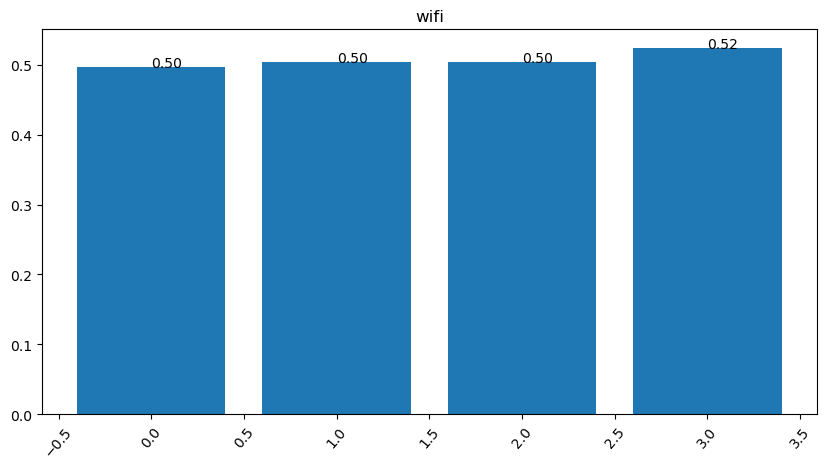

In [26]:
for column in database.columns:
    if column != 'price_range': 
        x = database.groupby('price_range')[column].mean()
        plt.figure(figsize=(10,5))
        plt.bar(x.index,x.values,label = column)
        plt.title(f'{column}')
        plt.xticks(rotation=50)
        for i, valor in enumerate(x.values):
            plt.text(i, valor, f'{valor:.2f}')
        plt.plot() 


### Os gráficos de média de cada uma das propriedades dos celulares, mantém um crescimento em maior parte dos dados usando como referência a categoria 0 e a categoria 3, o que define que a 3 é a categoria de preços mais altos, isso fica muito explicito no gráfico de memória RAM que tem um gráfico BEM ASCENDENTE

<Axes: >

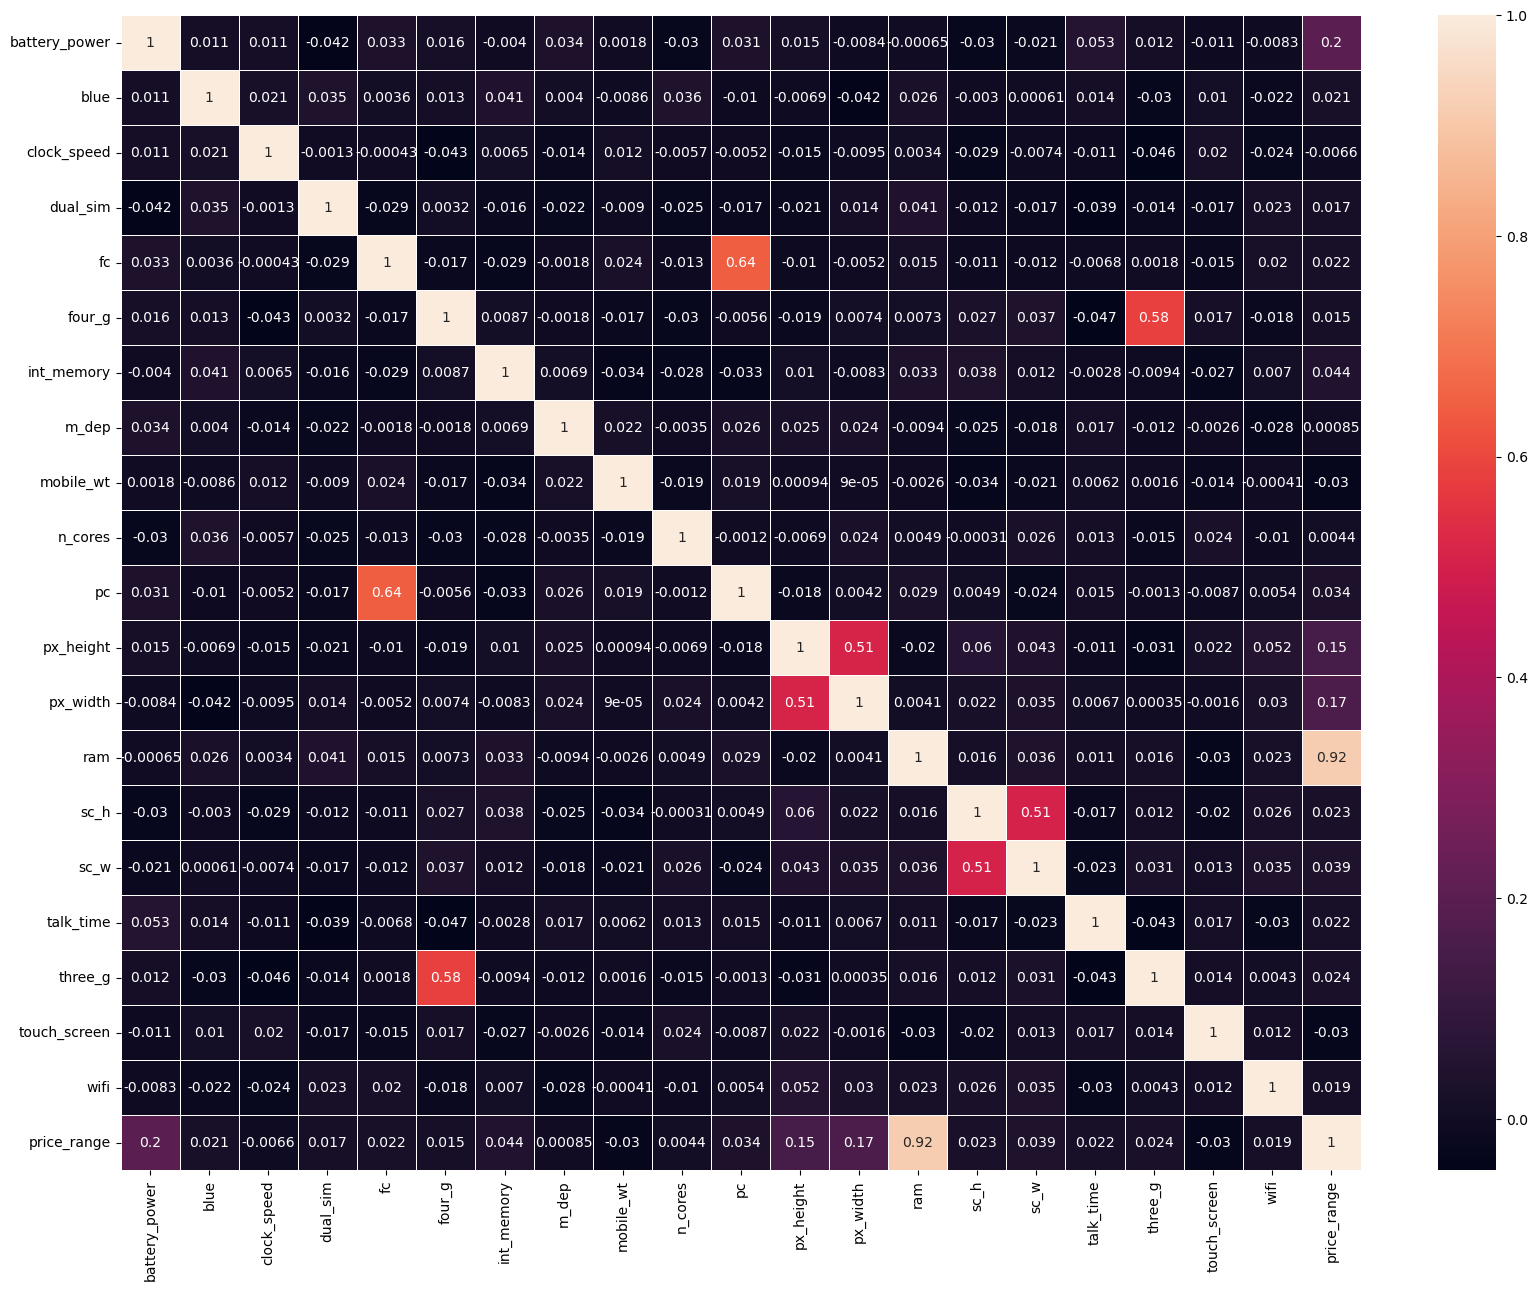

In [43]:
corr = database.corr()
f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot = True, linewidths=.5 )


### Nessa matriz de correlação, se olharmos para última linha de price_range é possível observar a correlação com a variável RAM de 0.92 uma correlação quase que perfeita, o que infere que a RAM tem muito envolvimento no aumento do preço dos celulares. Com ponto de atenção também aos valores de tamanho de tela (px_height e px_width) e battery power.

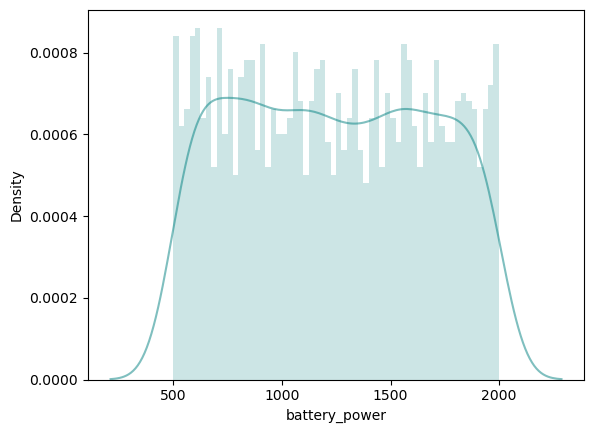

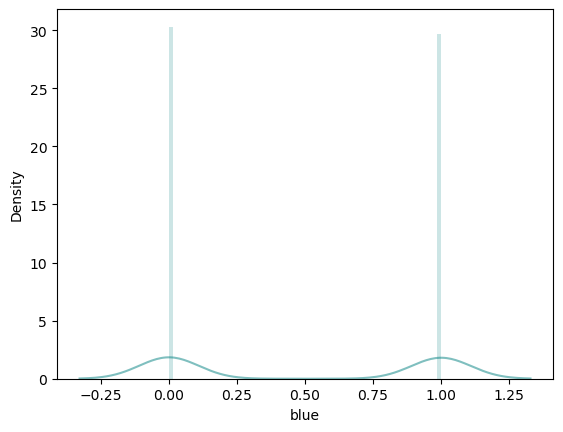

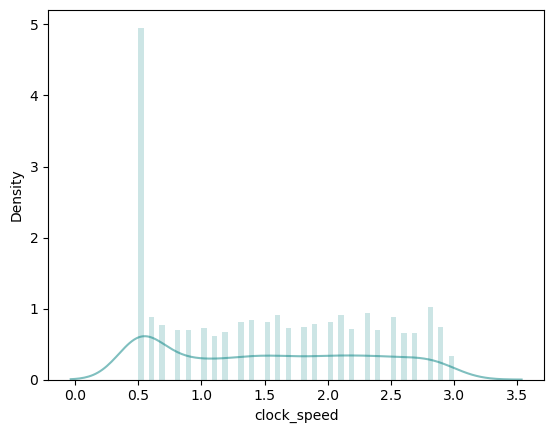

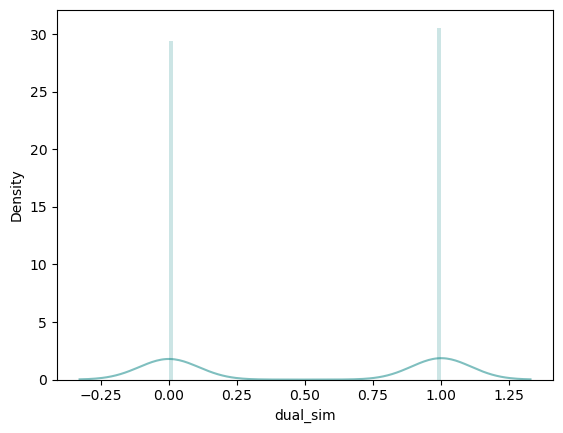

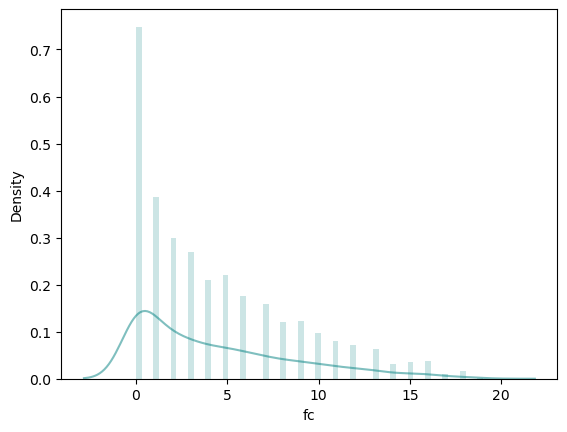

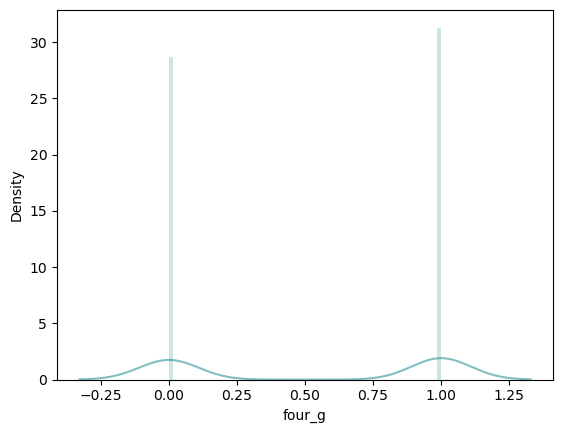

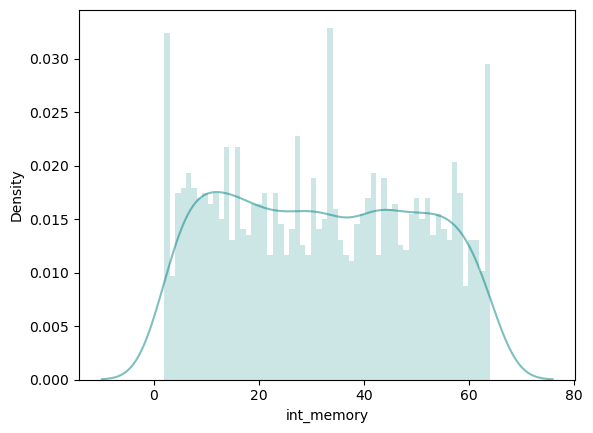

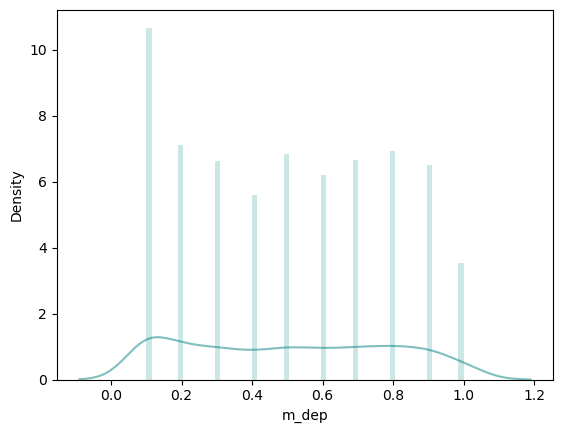

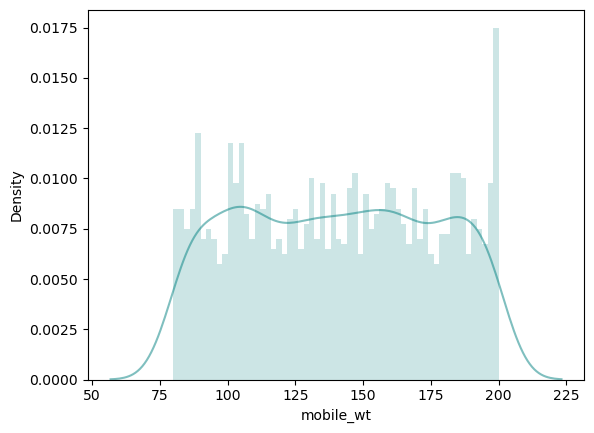

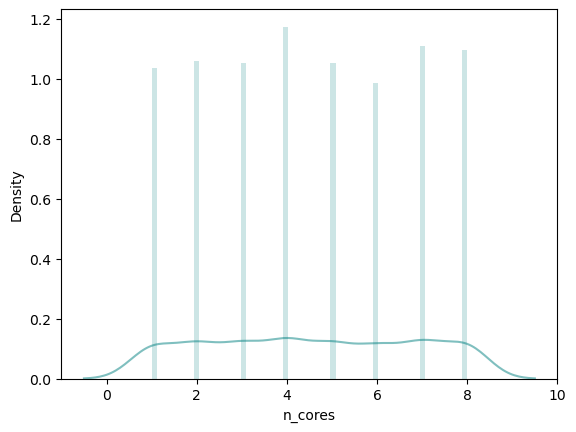

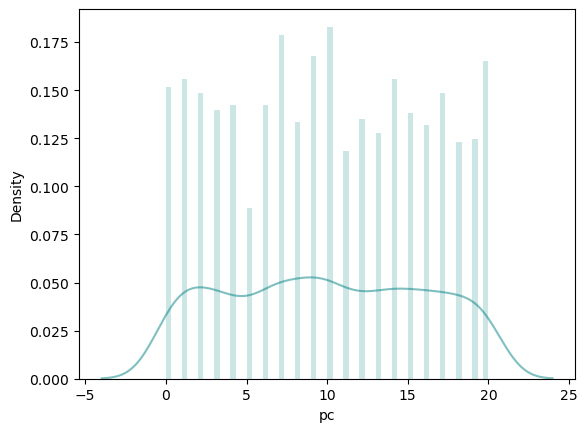

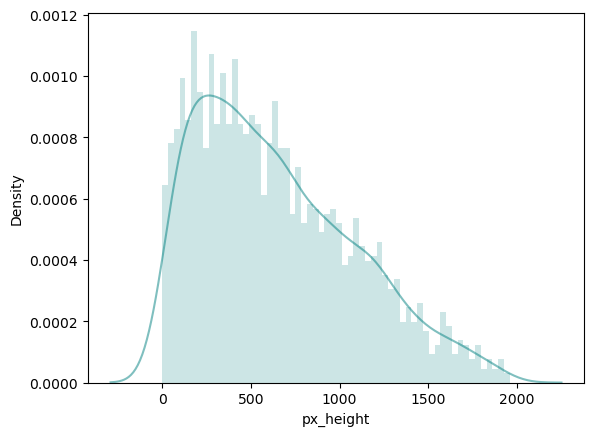

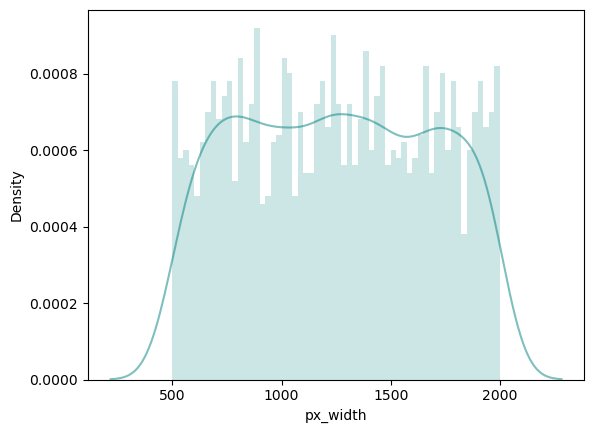

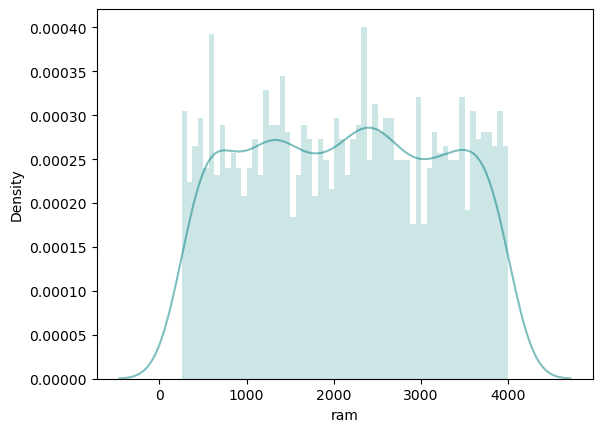

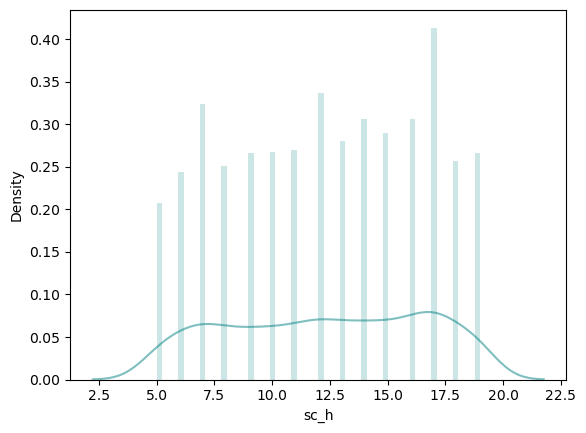

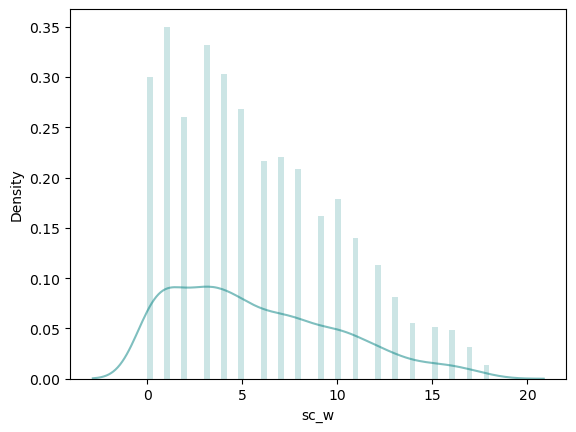

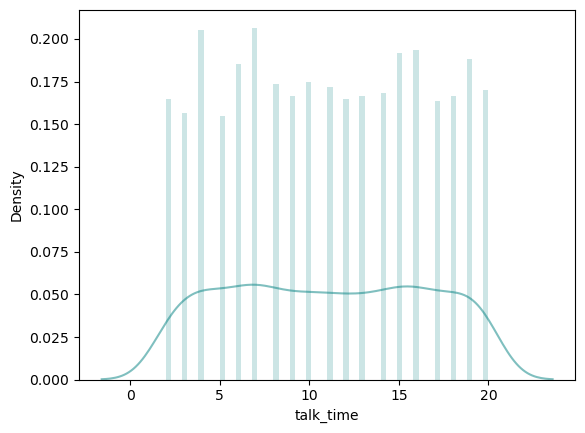

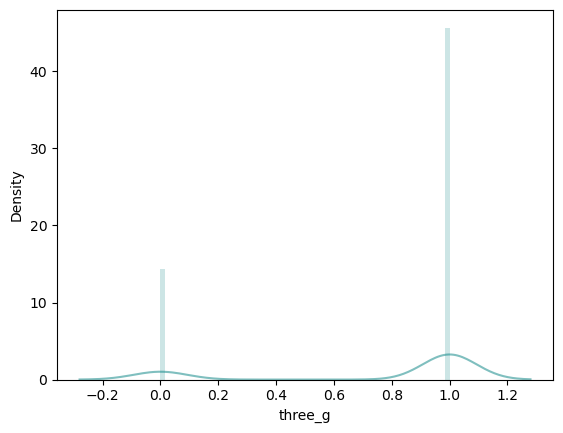

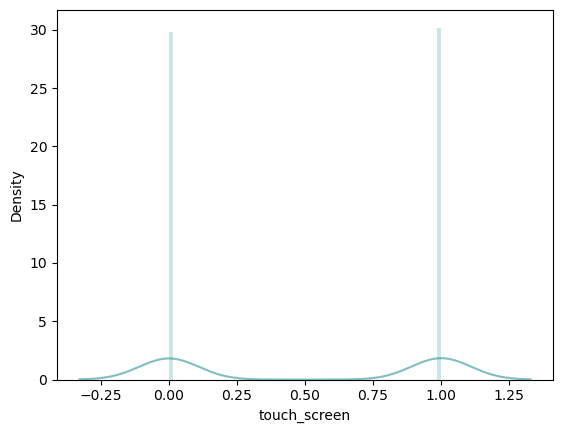

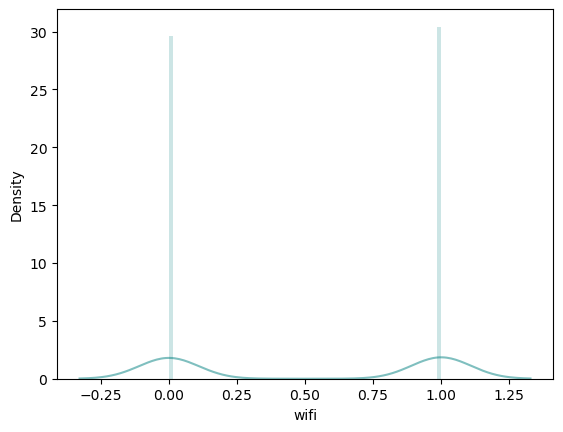

In [46]:
for i in database.drop('price_range', axis=1).columns:
    
    kde = sns.kdeplot(data=database, x=i, color='teal', alpha=0.5)

    hist = plt.hist(database[i], bins=60, alpha=0.2, color='teal', density=True)
    
    plt.show()

### Os gráficos de densidade são ótimos para entender a disposição da organização dos dados, como exemplo dos gráficos de wifi e touch_screen, agora é possível entender que valores 1 representam celulares que têm touch e 0 representa os que não tem, o mesmo ocorre para celulares com wifi.
### Nos outros gráficos percebemos a presença de diferentes tipos de distribuição com base nas características, mas ao meu ver não temos valores fora do padrão.

In [52]:
database.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

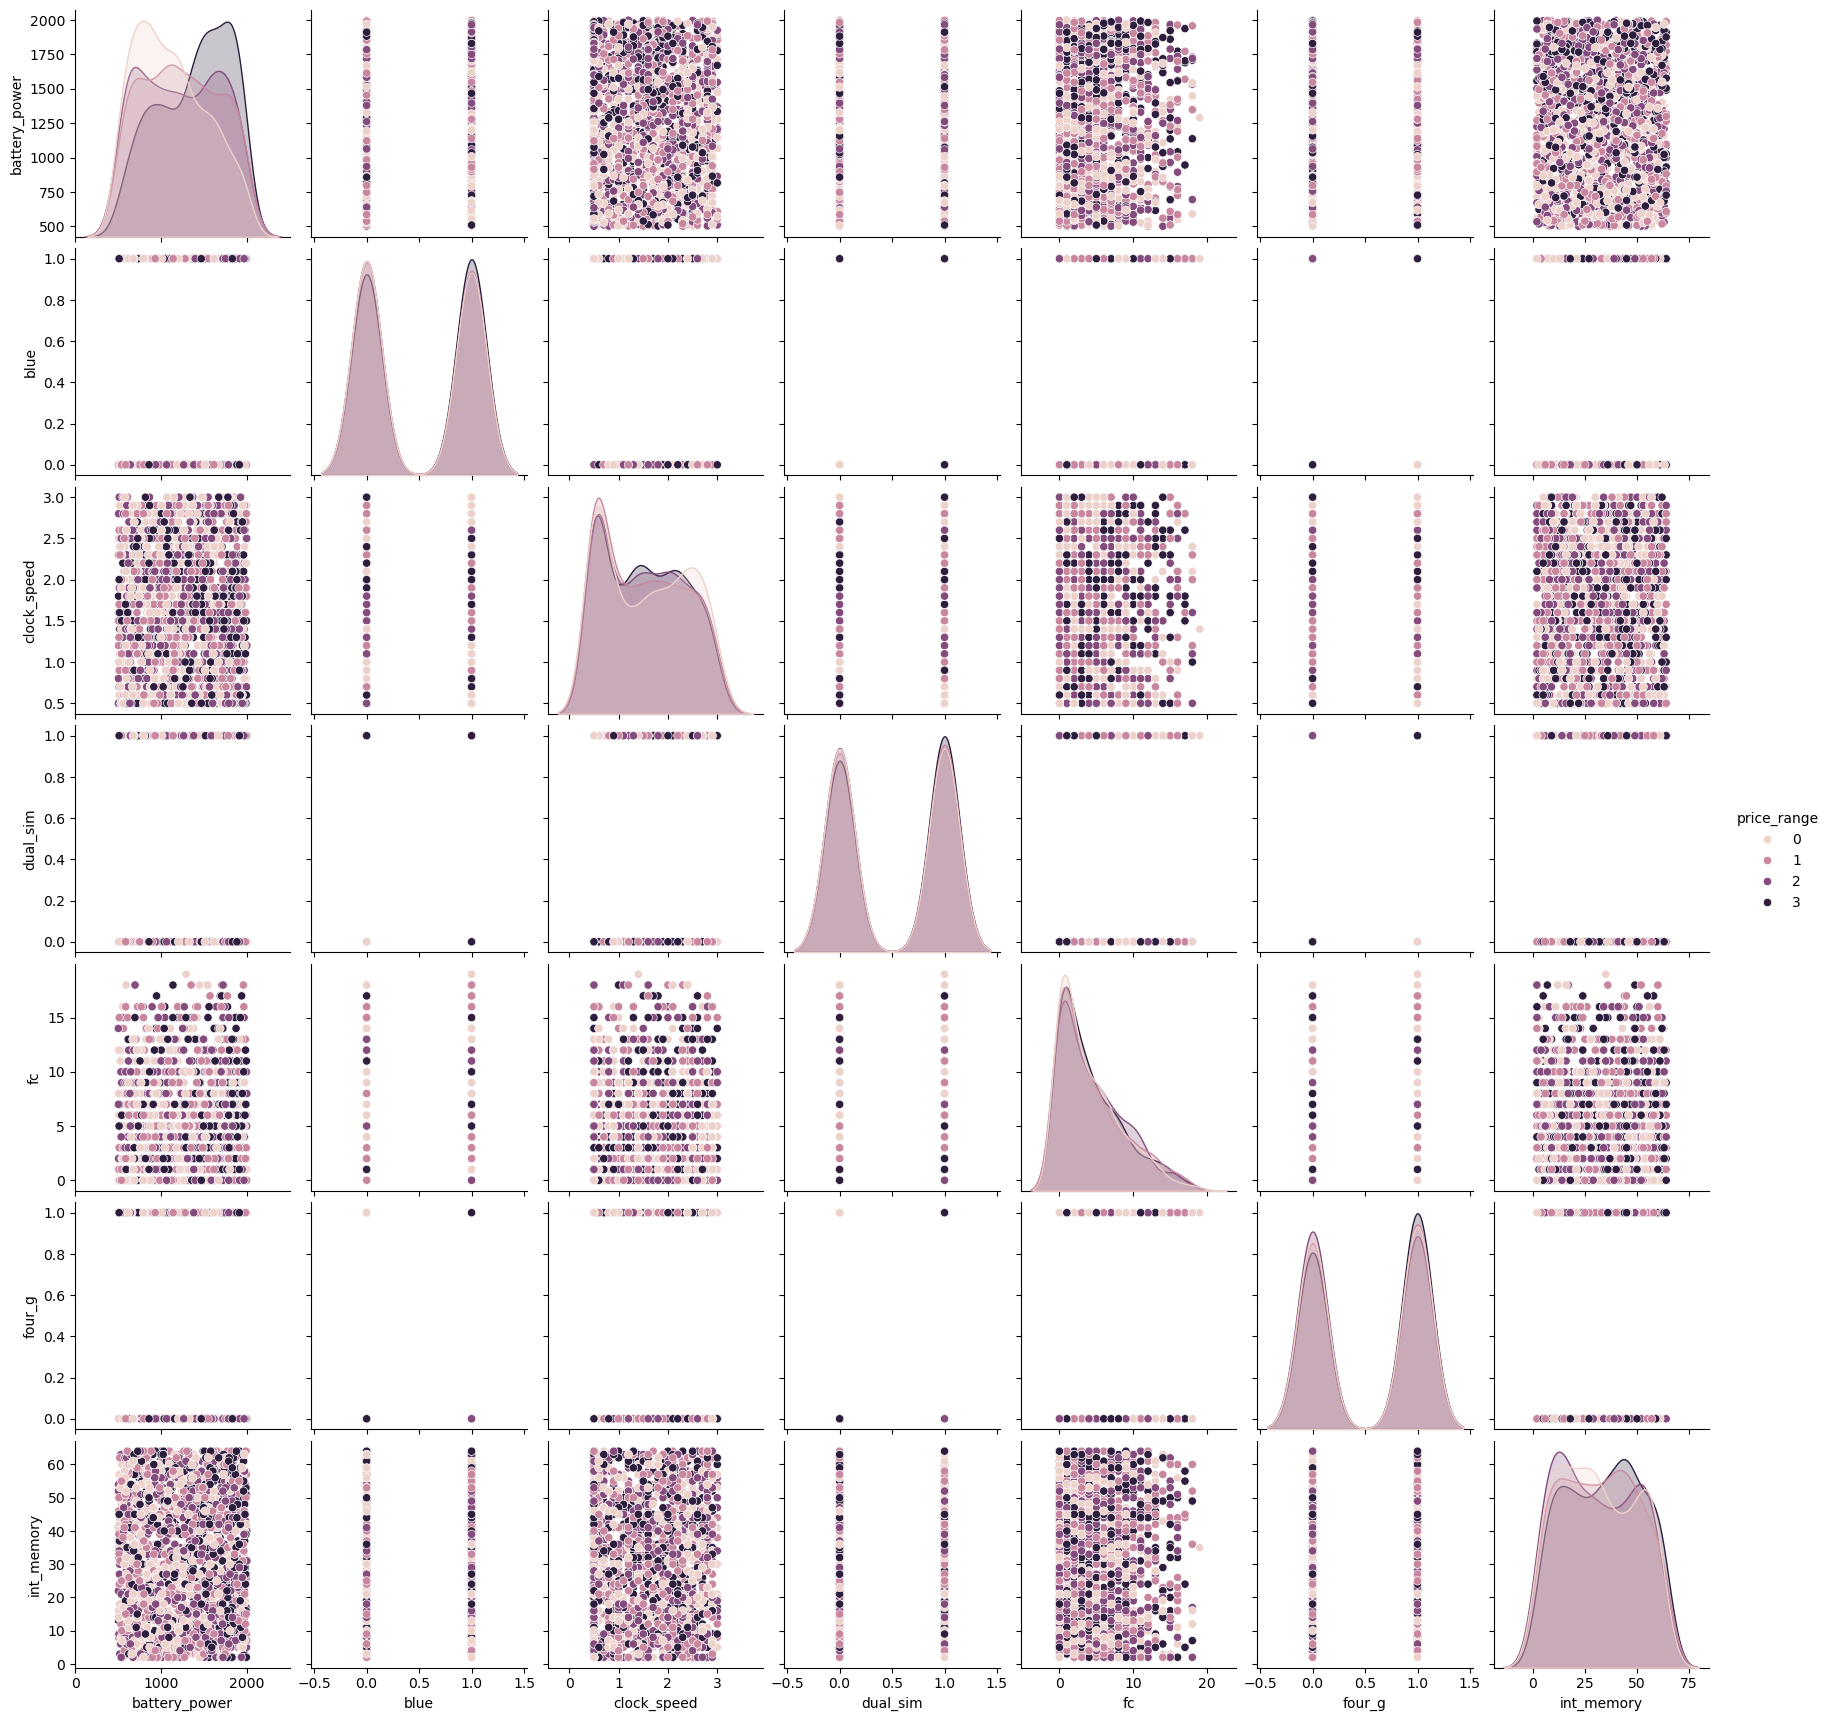

In [55]:
sns.pairplot(database[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory','price_range' ]],hue='price_range')

### Pensando nisso aplicaremos árvore de decisão com DecisionTreeClassifier() e LogisticRegression(), ambas do SciKit Learn

In [57]:
database_teste = pd.read_csv("C:/Users/ireis/Desktop/Projetos Python/Python/Datasets/Preço de Celular/test.csv")

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [115]:
X = database.drop('price_range', axis=1)
y = database['price_range']

In [166]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [117]:
X_train,X_teste,y_train,y_teste = train_test_split(X_scaler,y,test_size=0.19,random_state=42,stratify=y)
decision = DecisionTreeClassifier()
decision.fit(X_train,y_train)
y_pred = decision.predict(X_teste)
accuracy = accuracy_score(y_teste, y_pred)
print(f"{decision.__class__.__name__}: {accuracy:.2f}")

DecisionTreeClassifier: 0.86


In [118]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_teste,y_pred)

array([[89,  6,  0,  0],
       [ 9, 77,  9,  0],
       [ 0, 10, 78,  7],
       [ 0,  0, 14, 81]], dtype=int64)

[Text(0.4938587306701031, 0.9583333333333334, 'ram <= 0.099\ngini = 0.75\nsamples = 1620\nvalue = [405, 405, 405, 405]'),
 Text(0.1831105025773196, 0.875, 'ram <= -0.988\ngini = 0.586\nsamples = 851\nvalue = [405, 358, 88, 0]'),
 Text(0.07925257731958762, 0.7916666666666666, 'px_height <= 1.812\ngini = 0.168\nsamples = 346\nvalue = [314, 32, 0, 0]'),
 Text(0.06056701030927835, 0.7083333333333334, 'battery_power <= 1.316\ngini = 0.109\nsamples = 330\nvalue = [311, 19, 0, 0]'),
 Text(0.03865979381443299, 0.625, 'int_memory <= 1.734\ngini = 0.041\nsamples = 288\nvalue = [282, 6, 0, 0]'),
 Text(0.02577319587628866, 0.5416666666666666, 'px_width <= 1.232\ngini = 0.028\nsamples = 284\nvalue = [280, 4, 0, 0]'),
 Text(0.015463917525773196, 0.4583333333333333, 'talk_time <= -1.558\ngini = 0.008\nsamples = 253\nvalue = [252, 1, 0, 0]'),
 Text(0.010309278350515464, 0.375, 'm_dep <= 1.381\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0, 0]'),
 Text(0.005154639175257732, 0.2916666666666667, 'gini = 0.

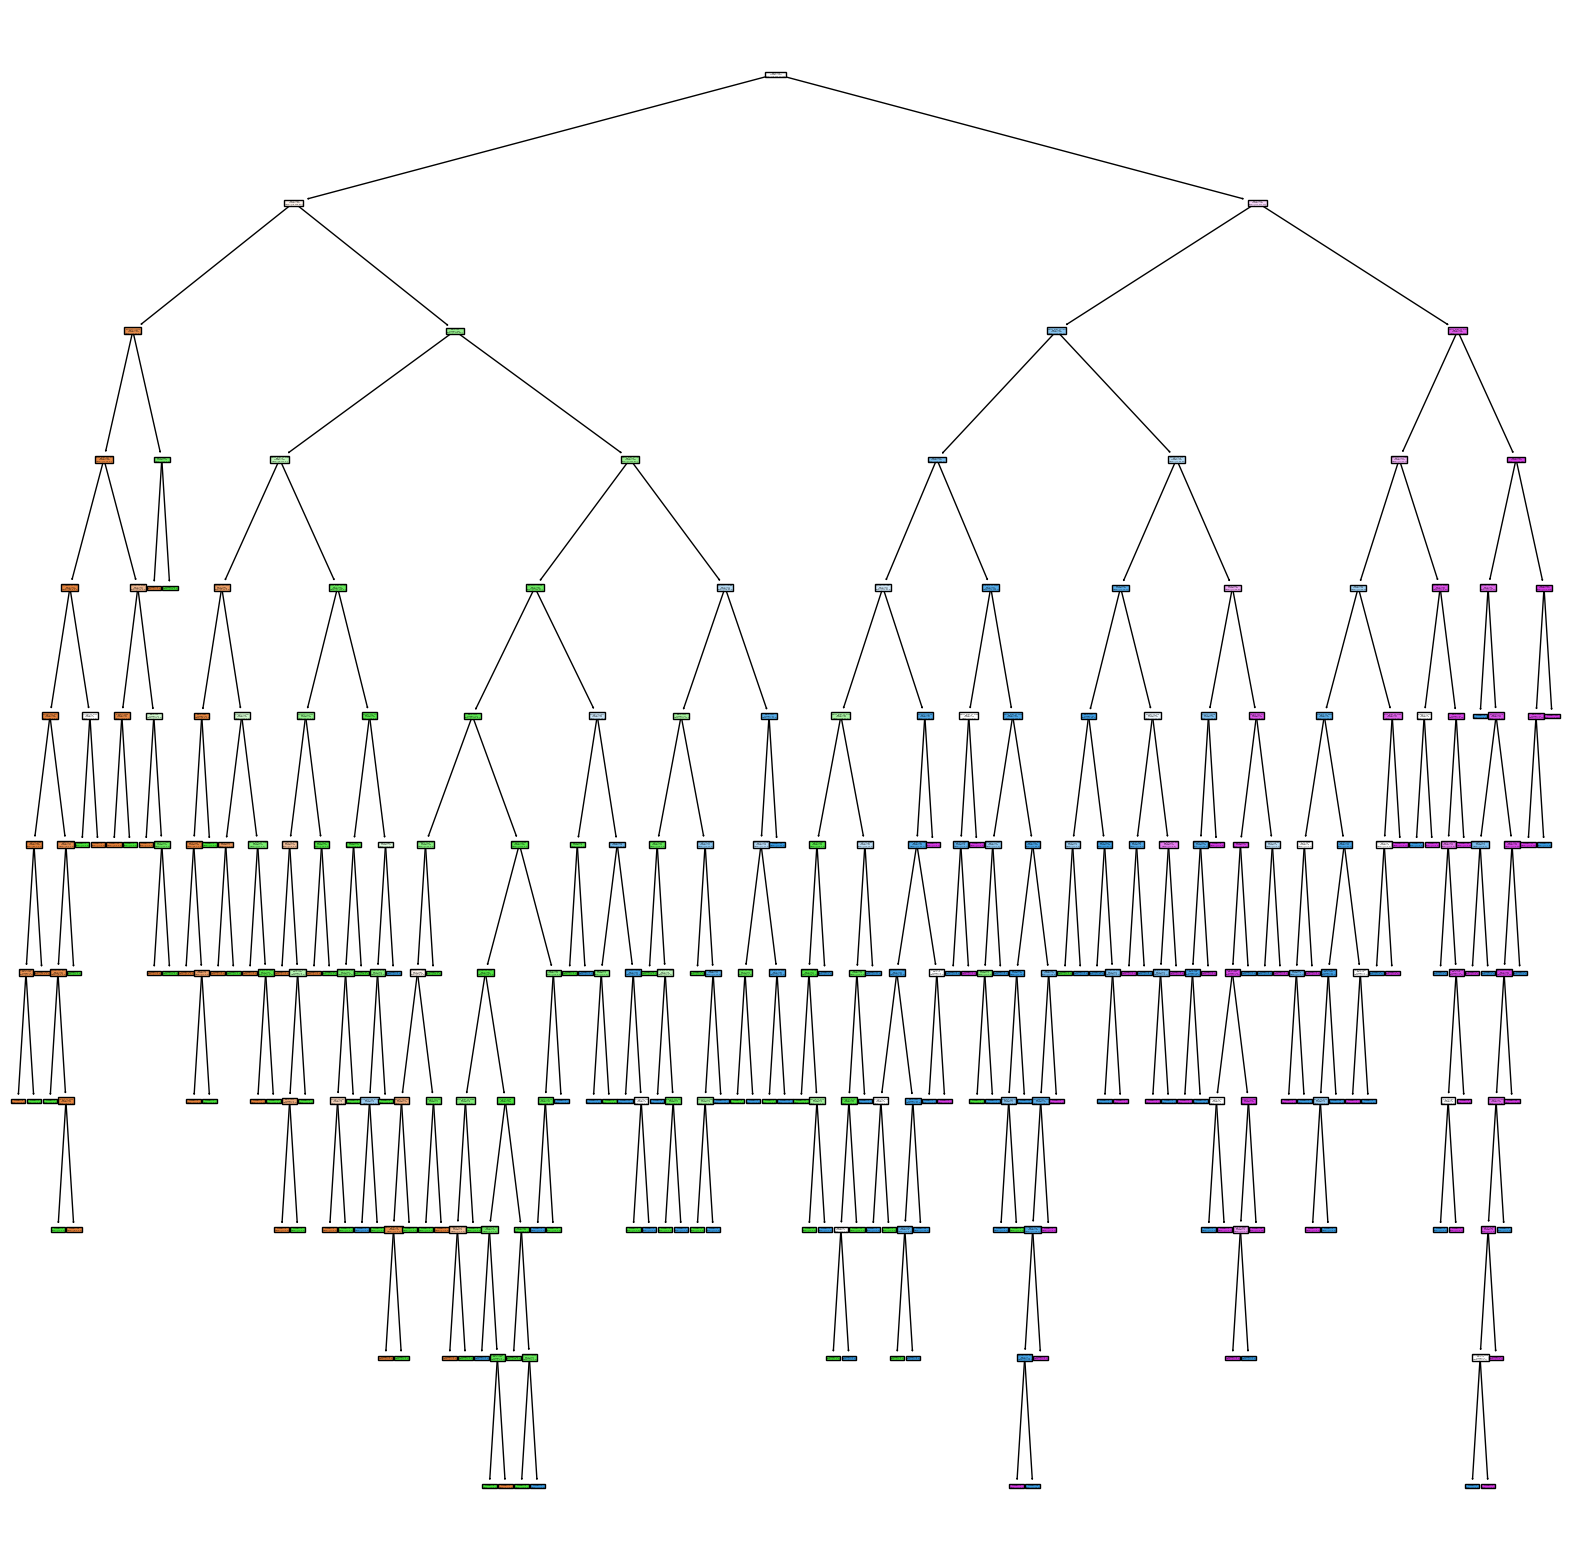

In [111]:
from sklearn import tree
import matplotlib.pyplot as plt
figura,eixos = plt.subplots(nrows=1,ncols=1,figsize=(20,20))
tree.plot_tree(decision, feature_names=X.columns,filled = True)

### Com o teste utilizando a classe DecisionTree, encontramos uma acurácia nos dados de 86%

In [167]:
X_train,X_teste,y_train,y_teste = train_test_split(X_scaler,y,test_size=0.10,random_state=42,stratify=y)
decision = LogisticRegression(multi_class = "multinomial")
decision.fit(X_train,y_train)
y_pred = decision.predict(X_teste)
accuracy = accuracy_score(y_teste, y_pred)
print(f"{decision.__class__.__name__}: {accuracy:.2f}")

LogisticRegression: 0.97


In [168]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_teste,y_pred)

array([[49,  1,  0,  0],
       [ 0, 48,  2,  0],
       [ 0,  0, 48,  2],
       [ 0,  0,  0, 50]], dtype=int64)

### E com o teste utilizando regressão logística para multiclasse encontramos uma acurácia de 97%
### Dessa forma usaremos um arquivo.csv para fazermos as predições com base em novas informações, e para isso utilizaremos o modelo com mlehor acurácia - LogisticRegression()

In [172]:
melhor_modelo = LogisticRegression(max_iter=1000,multi_class = "multinomial",solver='saga')
melhor_modelo.fit(X,y)

testes = melhor_modelo.predict(database_teste)
database_teste['price_range_previsto'] = testes

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [173]:
database_teste.to_excel("C:/Users/ireis/Desktop/TIKTOK/database_teste.xlsx",index=False)

In [171]:
database_teste.drop('price_range_previsto',axis=1,inplace=True)